In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [2]:
%matplotlib inline

In [3]:
weather = pd.read_table("../daily_weather.tsv")

### Plot the daily temperature over the course of the year. (This should probably be a line chart.) Create a bar chart that shows the average temperature and humidity by month.

In [4]:
weather['date'] = pd.DatetimeIndex(weather.date)

In [5]:
weather["months"] = pd.DatetimeIndex(weather.date).month

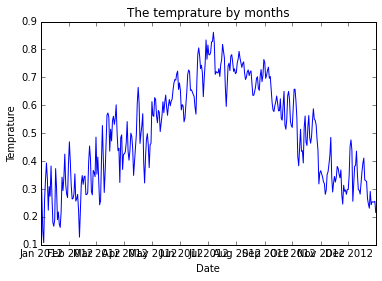

In [6]:
plt.plot(weather['date'], weather['temp'])
plt.title("The temprature by months")
plt.xlabel("Date")
plt.ylabel("Temprature")
plt.show()

I dont like this x axis display, but I can live with it

In [7]:
x = weather.groupby("months").agg({"humidity": np.mean})

theres problably a better way

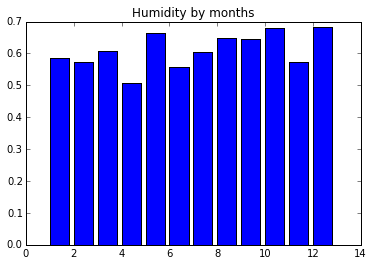

In [8]:
plt.bar([n for n in range(1, 13)], x["humidity"])
plt.title("Humidity by months")
plt.show()

### Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

In [9]:
w = weather[['season_desc', 'temp', 'total_riders']]
fall = w.loc[w['season_desc'] == 'Fall']
winter = w.loc[w['season_desc'] == 'Winter']
spring = w.loc[w['season_desc'] == 'Spring']
summer = w.loc[w['season_desc'] == 'Summer']

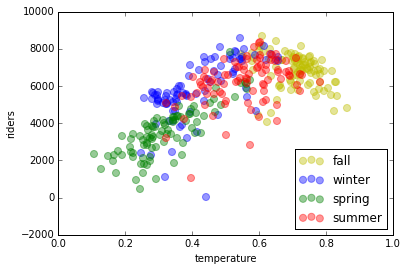

In [10]:
plt.scatter(fall['temp'], fall['total_riders'], color='y', label='fall', s=50, alpha=.41)
plt.scatter(winter['temp'], winter['total_riders'], color='b', label='winter', s=50, alpha=.41)
plt.scatter(spring['temp'], spring['total_riders'], color='g', label='spring', s=50, alpha=.41)
plt.scatter(summer['temp'], summer['total_riders'], color='r', label='summer', s=50, alpha=.41)
plt.legend(loc='lower right')
plt.xlabel('temperature')
plt.ylabel('riders')
plt.show() 

### Create another scatterplot to show how daily rental volume varies with windspeed.  As above, use a different series for each season.

In [11]:
w = weather[['season_desc', 'windspeed', 'total_riders']]
fall = w.loc[w['season_desc'] == 'Fall']
winter = w.loc[w['season_desc'] == 'Winter']
spring = w.loc[w['season_desc'] == 'Spring']
summer = w.loc[w['season_desc'] == 'Summer']

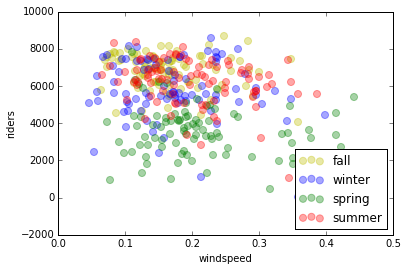

In [12]:
plt.scatter(fall['windspeed'], fall['total_riders'], color='y', label='fall', s=50, alpha=.35)
plt.scatter(winter['windspeed'], winter['total_riders'], color='b', label='winter', s=50, alpha=.35)
plt.scatter(spring['windspeed'], spring['total_riders'], color='g', label='spring', s=50, alpha=.35)
plt.scatter(summer['windspeed'], summer['total_riders'], color='r', label='summer', s=50, alpha=.35)
plt.legend(loc='lower right')
plt.xlabel('windspeed')
plt.ylabel('riders')
plt.show() 

### How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.

In [15]:
stations = pd.read_table("../stations.tsv")

In [16]:
usage = pd.read_table("../usage_2012.tsv")

In [17]:
s = stations[['station','lat','long']]
u = pd.concat([usage['station_start']], axis=1, keys=['station'])
counts = u['station'].value_counts()
c = DataFrame(counts.index, columns=['station'])
c['counts'] = counts.values
m = pd.merge(s, c, on='station') 

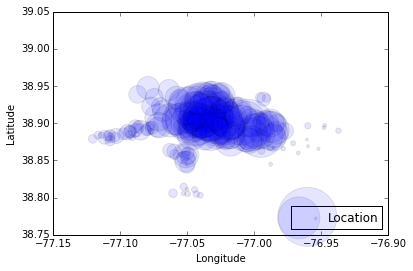

In [23]:
plt.scatter(m['long'], m['lat'], c='b', label='Location', s=(m['counts'] * .05), alpha=.1)
plt.legend(loc='lower right')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()